## Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from keras import Sequential
from keras.layers import Dense, Flatten
import keras
import cv2
import numpy as np
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
plt.style.use('dark_background')

## Load Data

In [52]:
(X_train, y_train), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

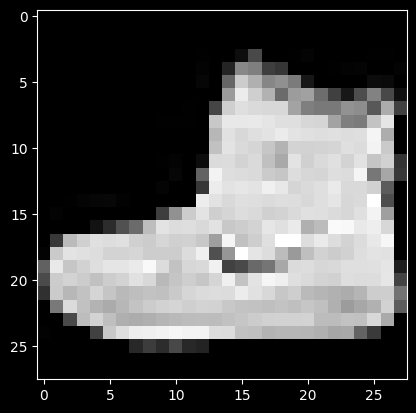

In [53]:
plt.imshow(X_train[0],cmap='gray')

In [54]:
y_train[0]

9

In [55]:
X_train[0].shape

(28, 28)

## Reshape the (28,28) image to (64,64)

In [56]:
X_train_resized_images = []
X_test_resized_images = []

for i in range(len(X_train)):
  X_train_resized_images.append(cv2.resize(X_train[i], (64, 64)))
X_train_resized_images = np.array(X_train_resized_images)

for i in range(len(X_test)):
  X_test_resized_images.append(cv2.resize(X_test[i], (64, 64)))
X_test_resized_images = np.array(X_test_resized_images)

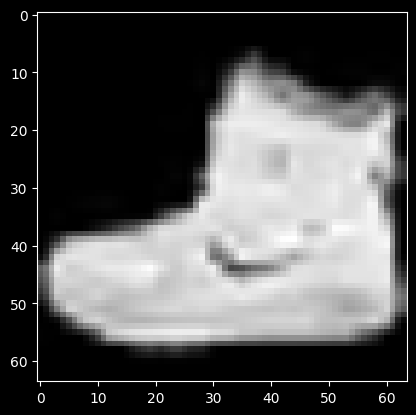

In [57]:
plt.imshow(X_train_resized_images[0],cmap='gray')

In [8]:
X_train_resized_images[0].shape

(64, 64)

In [9]:
class_labels = ["T-shirt/top","Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt","Sneaker","Bag","Ankle boot"]

## Normalise the intensity values

In [10]:
X_train_resized_images = X_train_resized_images/255.0
X_test_resized_images = X_test_resized_images/255.0

## Model Architecture - 1

In [18]:
model1 = Sequential()
model1.add(Flatten(input_shape=(64,64)))
model1.add(Dense(64,activation='relu'))
model1.add(Dense(32,activation='relu'))
model1.add(Dense(10,activation='sigmoid'))

model1.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history1 = model1.fit(X_train_resized_images, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.5469 - accuracy: 0.8065 - val_loss: 0.4867 - val_accuracy: 0.8328
Epoch 2/50
1500/1500 [==============================] - 21s 14ms/step - loss: 0.4202 - accuracy: 0.8482 - val_loss: 0.4121 - val_accuracy: 0.8508
Epoch 3/50
1500/1500 [==============================] - 14s 9ms/step - loss: 0.3884 - accuracy: 0.8584 - val_loss: 0.4191 - val_accuracy: 0.8516
Epoch 4/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3667 - accuracy: 0.8656 - val_loss: 0.3913 - val_accuracy: 0.8556
Epoch 5/50
1500/1500 [==============================] - 15s 10ms/step - loss: 0.3483 - accuracy: 0.8723 - val_loss: 0.4215 - val_accuracy: 0.8478
Epoch 6/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.3382 - accuracy: 0.8754 - val_loss: 0.3716 - val_accuracy: 0.8692
Epoch 7/50
1500/1500 [==============================] - 20s 13ms/step - loss: 0.3259 - accuracy: 0.8798 - val_loss: 0.4036 - 

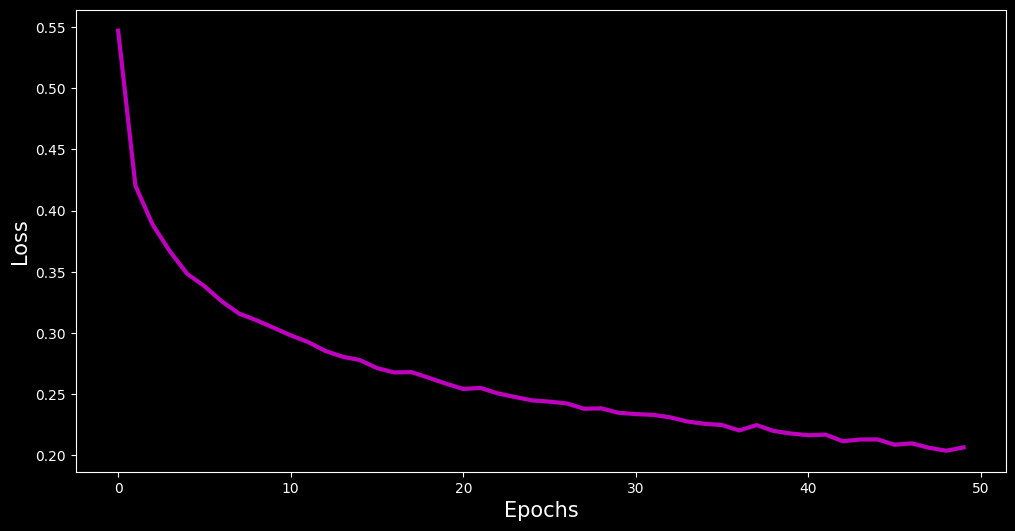

In [19]:
plt.figure(figsize =(12,6))
plt.plot(history1.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

## Testing

In [44]:
y_prob = model1.predict(X_test_resized_images)
y_pred = y_prob.argmax(axis=1)
print("Accuracy of Model 1: ", accuracy_score(y_test,y_pred))

313/313 [==============================] - 1s 3ms/step
Accuracy of Model 1:  0.8691


In [45]:
print("Confusion Matrix:")
print(classification_report(y_test, y_pred))
print(" ")
print(" ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.89      0.89      0.89      1000
           4       0.84      0.73      0.78      1000
           5       0.93      0.95      0.94      1000
           6       0.68      0.73      0.71      1000
           7       0.86      0.97      0.91      1000
           8       0.96      0.96      0.96      1000
           9       0.97      0.83      0.90      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

 
 
[[845   5   9  16   4   0 113   0   8   0]
 [  8 969   0  18   2   0   1   0   2   0]
 [ 20   0 810   8  62   1  97   0   2   0]
 [ 28  10  13 885  31   0  29   1   3   0]
 [  2   1 127  42 732   0  92   0   4   0]
 [  

## Model Architecture - 2(with drop out)

In [21]:
model2 = Sequential()
model2.add(Flatten(input_shape=(64,64)))
model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(32,activation='relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,activation='sigmoid'))

model2.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history2 = model2.fit(X_train_resized_images, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.7255 - accuracy: 0.7433 - val_loss: 0.4520 - val_accuracy: 0.8390
Epoch 2/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.5481 - accuracy: 0.8075 - val_loss: 0.4470 - val_accuracy: 0.8385
Epoch 3/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5088 - accuracy: 0.8177 - val_loss: 0.4262 - val_accuracy: 0.8425
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4911 - accuracy: 0.8260 - val_loss: 0.4093 - val_accuracy: 0.8532
Epoch 5/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4703 - accuracy: 0.8306 - val_loss: 0.4139 - val_accuracy: 0.8477
Epoch 6/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.4659 - accuracy: 0.8323 - val_loss: 0.3987 - val_accuracy: 0.8556
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4566 - accuracy: 0.8356 - val_loss: 0.4050 - val_ac

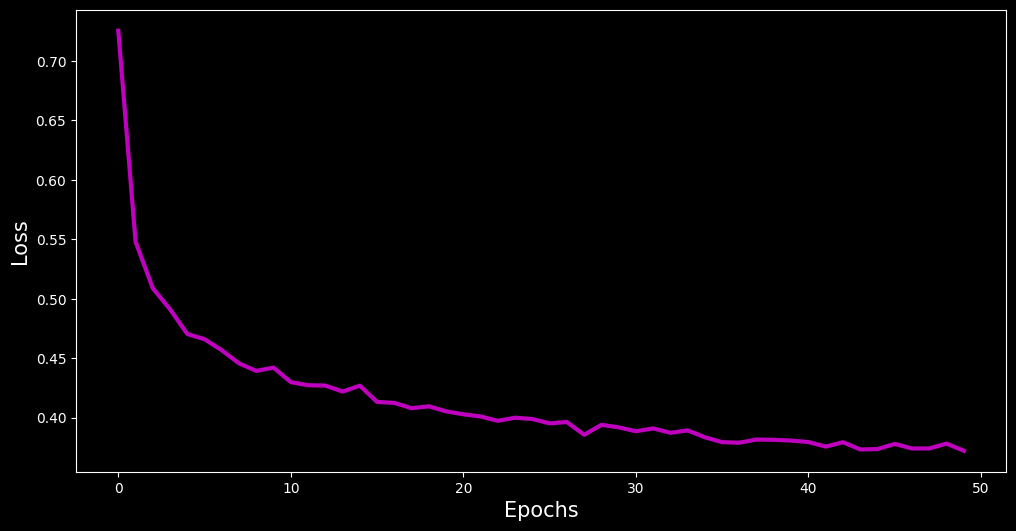

In [22]:
plt.figure(figsize =(12,6))
plt.plot(history2.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

## Testing

In [46]:
y_prob = model2.predict(X_test_resized_images)
y_pred = y_prob.argmax(axis=1)
print("Accuracy of Model 2: ",accuracy_score(y_test,y_pred))

313/313 [==============================] - 1s 5ms/step
Accuracy of Model 2:  0.8419


In [47]:
print("Confusion Matrix:")
print(classification_report(y_test, y_pred))
print(" ")
print(" ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.81      0.82      0.82      1000
           1       0.99      0.95      0.97      1000
           2       0.70      0.84      0.77      1000
           3       0.84      0.90      0.87      1000
           4       0.84      0.69      0.76      1000
           5       0.82      0.95      0.88      1000
           6       0.66      0.64      0.65      1000
           7       0.86      0.98      0.92      1000
           8       0.98      0.95      0.97      1000
           9       0.98      0.69      0.81      1000

    accuracy                           0.84     10000
   macro avg       0.85      0.84      0.84     10000
weighted avg       0.85      0.84      0.84     10000

 
 
[[821   1  10  49   2   0 111   0   6   0]
 [  2 951   8  33   3   0   2   0   1   0]
 [ 16   1 843  11  61   0  68   0   0   0]
 [ 28   3  10 898  19   0  40   0   2   0]
 [  1   0 192  40 687   0  79   0   1   0]
 [  

## Model Architecture - 3(with batch normalization)

In [25]:
model3 = Sequential()
model3.add(Flatten(input_shape=(64,64)))
model3.add(Dense(64,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(32,activation='relu'))
model3.add(BatchNormalization())
model3.add(Dense(10,activation='sigmoid'))

model3.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history3 = model3.fit(X_train_resized_images, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 13s 8ms/step - loss: 0.5458 - accuracy: 0.8154 - val_loss: 0.4532 - val_accuracy: 0.8370
Epoch 2/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4273 - accuracy: 0.8476 - val_loss: 0.4276 - val_accuracy: 0.8454
Epoch 3/50
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3936 - accuracy: 0.8589 - val_loss: 0.3805 - val_accuracy: 0.8638
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3749 - accuracy: 0.8650 - val_loss: 0.4372 - val_accuracy: 0.8436
Epoch 5/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.3670 - accuracy: 0.8664 - val_loss: 0.3633 - val_accuracy: 0.8698
Epoch 6/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.3455 - accuracy: 0.8750 - val_loss: 0.4208 - val_accuracy: 0.8504
Epoch 7/50
1500/1500 [==============================] - 11s 8ms/step - loss: 0.3387 - accuracy: 0.8771 - val_loss: 0.3996 - val_ac

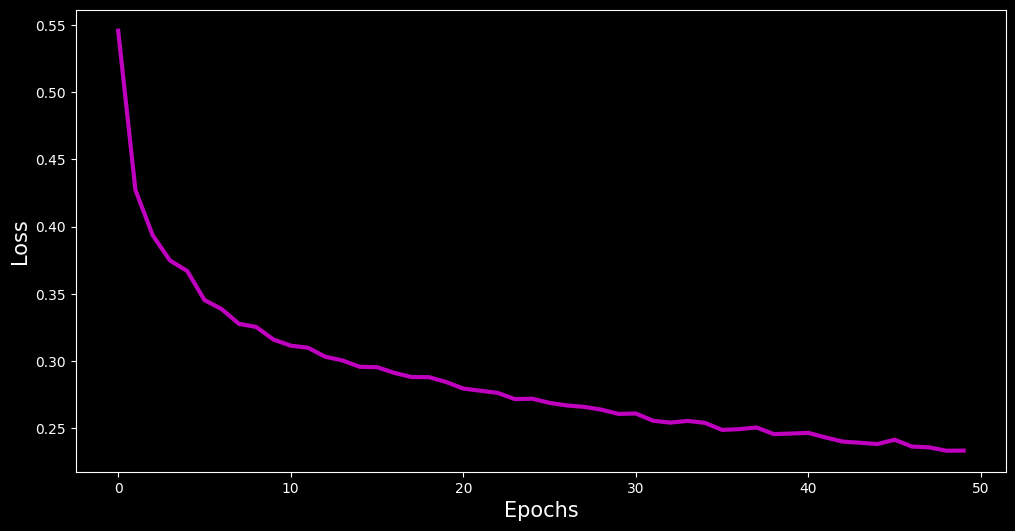

In [26]:
plt.figure(figsize =(12,6))
plt.plot(history3.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

## Testing

In [48]:
y_prob = model3.predict(X_test_resized_images)
y_pred = y_prob.argmax(axis=1)
print("Accuracy of Model 3: ", accuracy_score(y_test,y_pred))

313/313 [==============================] - 1s 4ms/step
Accuracy of Model 3:  0.8696


In [49]:
print("Confusion Matrix:")
print(classification_report(y_test, y_pred))
print(" ")
print(" ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.82      0.84      0.83      1000
           1       0.98      0.96      0.97      1000
           2       0.70      0.85      0.77      1000
           3       0.91      0.83      0.87      1000
           4       0.77      0.79      0.78      1000
           5       0.94      0.97      0.96      1000
           6       0.73      0.60      0.66      1000
           7       0.94      0.93      0.94      1000
           8       0.96      0.97      0.96      1000
           9       0.96      0.95      0.96      1000

    accuracy                           0.87     10000
   macro avg       0.87      0.87      0.87     10000
weighted avg       0.87      0.87      0.87     10000

 
 
[[842   2  42  19   7   1  74   0  13   0]
 [  4 962   6  19   5   0   2   0   2   0]
 [ 11   0 848   5  77   1  55   0   2   1]
 [ 25  13  39 828  71   1  17   0   5   1]
 [  0   0 127  11 791   1  69   0   1   0]
 [  

## Model Architecture - 4(with batch normalization and drop out)

In [29]:
model4 = Sequential()
model4.add(Flatten(input_shape=(64,64)))
model4.add(Dense(64,activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(32,activation='relu'))
model4.add(BatchNormalization())
model4.add(Dropout(0.2))
model4.add(Dense(10,activation='sigmoid'))

model4.compile(optimizer='adam', loss="sparse_categorical_crossentropy", metrics=['accuracy'])

history4 = model4.fit(X_train_resized_images, y_train, epochs=50, validation_split=0.2)

Epoch 1/50
1500/1500 [==============================] - 12s 7ms/step - loss: 0.6974 - accuracy: 0.7573 - val_loss: 0.4689 - val_accuracy: 0.8326
Epoch 2/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.5555 - accuracy: 0.8055 - val_loss: 0.4852 - val_accuracy: 0.8217
Epoch 3/50
1500/1500 [==============================] - 17s 11ms/step - loss: 0.5189 - accuracy: 0.8200 - val_loss: 0.4247 - val_accuracy: 0.8502
Epoch 4/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4964 - accuracy: 0.8271 - val_loss: 0.4258 - val_accuracy: 0.8509
Epoch 5/50
1500/1500 [==============================] - 10s 7ms/step - loss: 0.4780 - accuracy: 0.8334 - val_loss: 0.4214 - val_accuracy: 0.8575
Epoch 6/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4699 - accuracy: 0.8353 - val_loss: 0.4023 - val_accuracy: 0.8539
Epoch 7/50
1500/1500 [==============================] - 11s 7ms/step - loss: 0.4619 - accuracy: 0.8373 - val_loss: 0.4061 - val_a

## Plot the loss

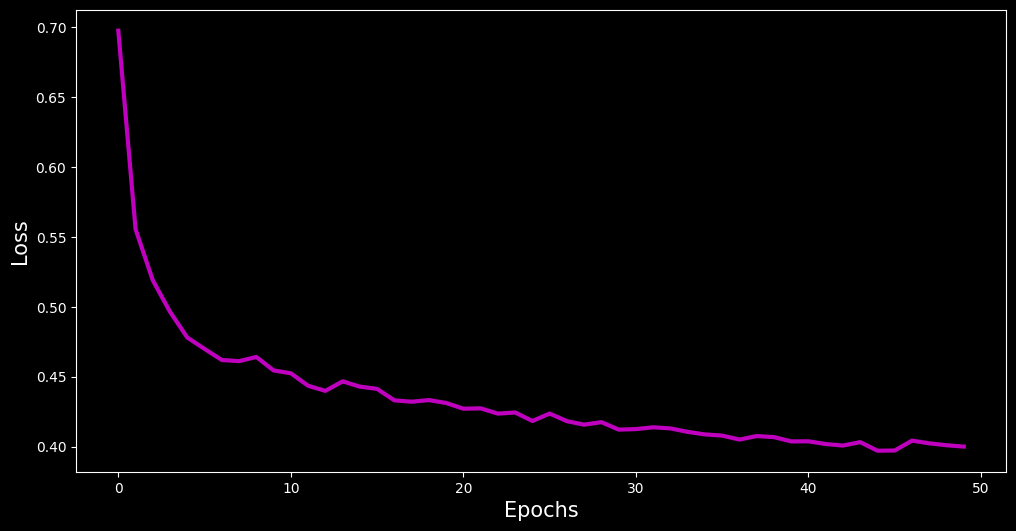

In [30]:
plt.figure(figsize =(12,6))
plt.plot(history4.history['loss'],'m', lw = 3, label= 'Training Loss')
plt.xlabel('Epochs', fontsize = 15)
plt.ylabel( 'Loss', fontsize = 15)
plt.show()

## Testing

In [50]:
y_prob = model4.predict(X_test_resized_images)
y_pred = y_prob.argmax(axis=1)
print("Model 4 Accuracy: ", accuracy_score(y_test,y_pred))

313/313 [==============================] - 1s 4ms/step
Model 4 Accuracy:  0.8522


In [51]:
print("Confusion Matrix:")
print(classification_report(y_test, y_pred))
print(" ")
print(" ")
print(confusion_matrix(y_test, y_pred))

Confusion Matrix:
              precision    recall  f1-score   support

           0       0.85      0.76      0.80      1000
           1       0.98      0.96      0.97      1000
           2       0.85      0.61      0.71      1000
           3       0.87      0.85      0.86      1000
           4       0.65      0.90      0.75      1000
           5       0.95      0.94      0.94      1000
           6       0.62      0.65      0.63      1000
           7       0.92      0.94      0.93      1000
           8       0.96      0.97      0.97      1000
           9       0.95      0.95      0.95      1000

    accuracy                           0.85     10000
   macro avg       0.86      0.85      0.85     10000
weighted avg       0.86      0.85      0.85     10000

 
 
[[756   2   5  37   7   0 183   0  10   0]
 [  3 961   2  24   6   0   3   0   1   0]
 [ 10   2 612  12 256   0 106   0   2   0]
 [ 17  10   3 846  64   0  54   0   6   0]
 [  0   0  34  16 904   1  44   0   1   0]
 [  

## Combined Plot

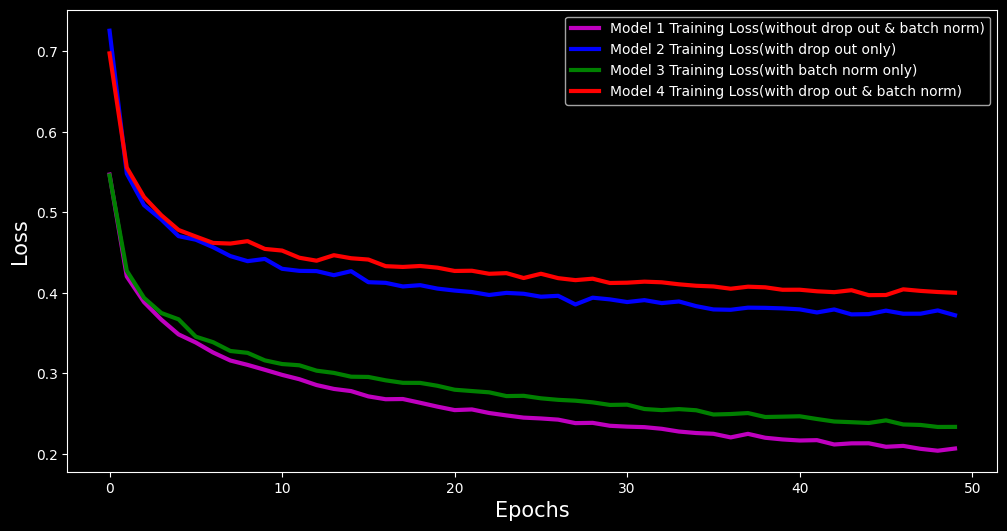

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.plot(history1.history['loss'], 'm', lw=3, label='Model 1 Training Loss(without drop out & batch norm)')

plt.plot(history2.history['loss'], 'b', lw=3, label='Model 2 Training Loss(with drop out only)')

plt.plot(history3.history['loss'], 'g', lw=3, label='Model 3 Training Loss(with batch norm only)')

plt.plot(history4.history['loss'], 'r', lw=3, label='Model 4 Training Loss(with drop out & batch norm)')

plt.xlabel('Epochs', fontsize=15)
plt.ylabel('Loss', fontsize=15)
plt.legend()
plt.show()


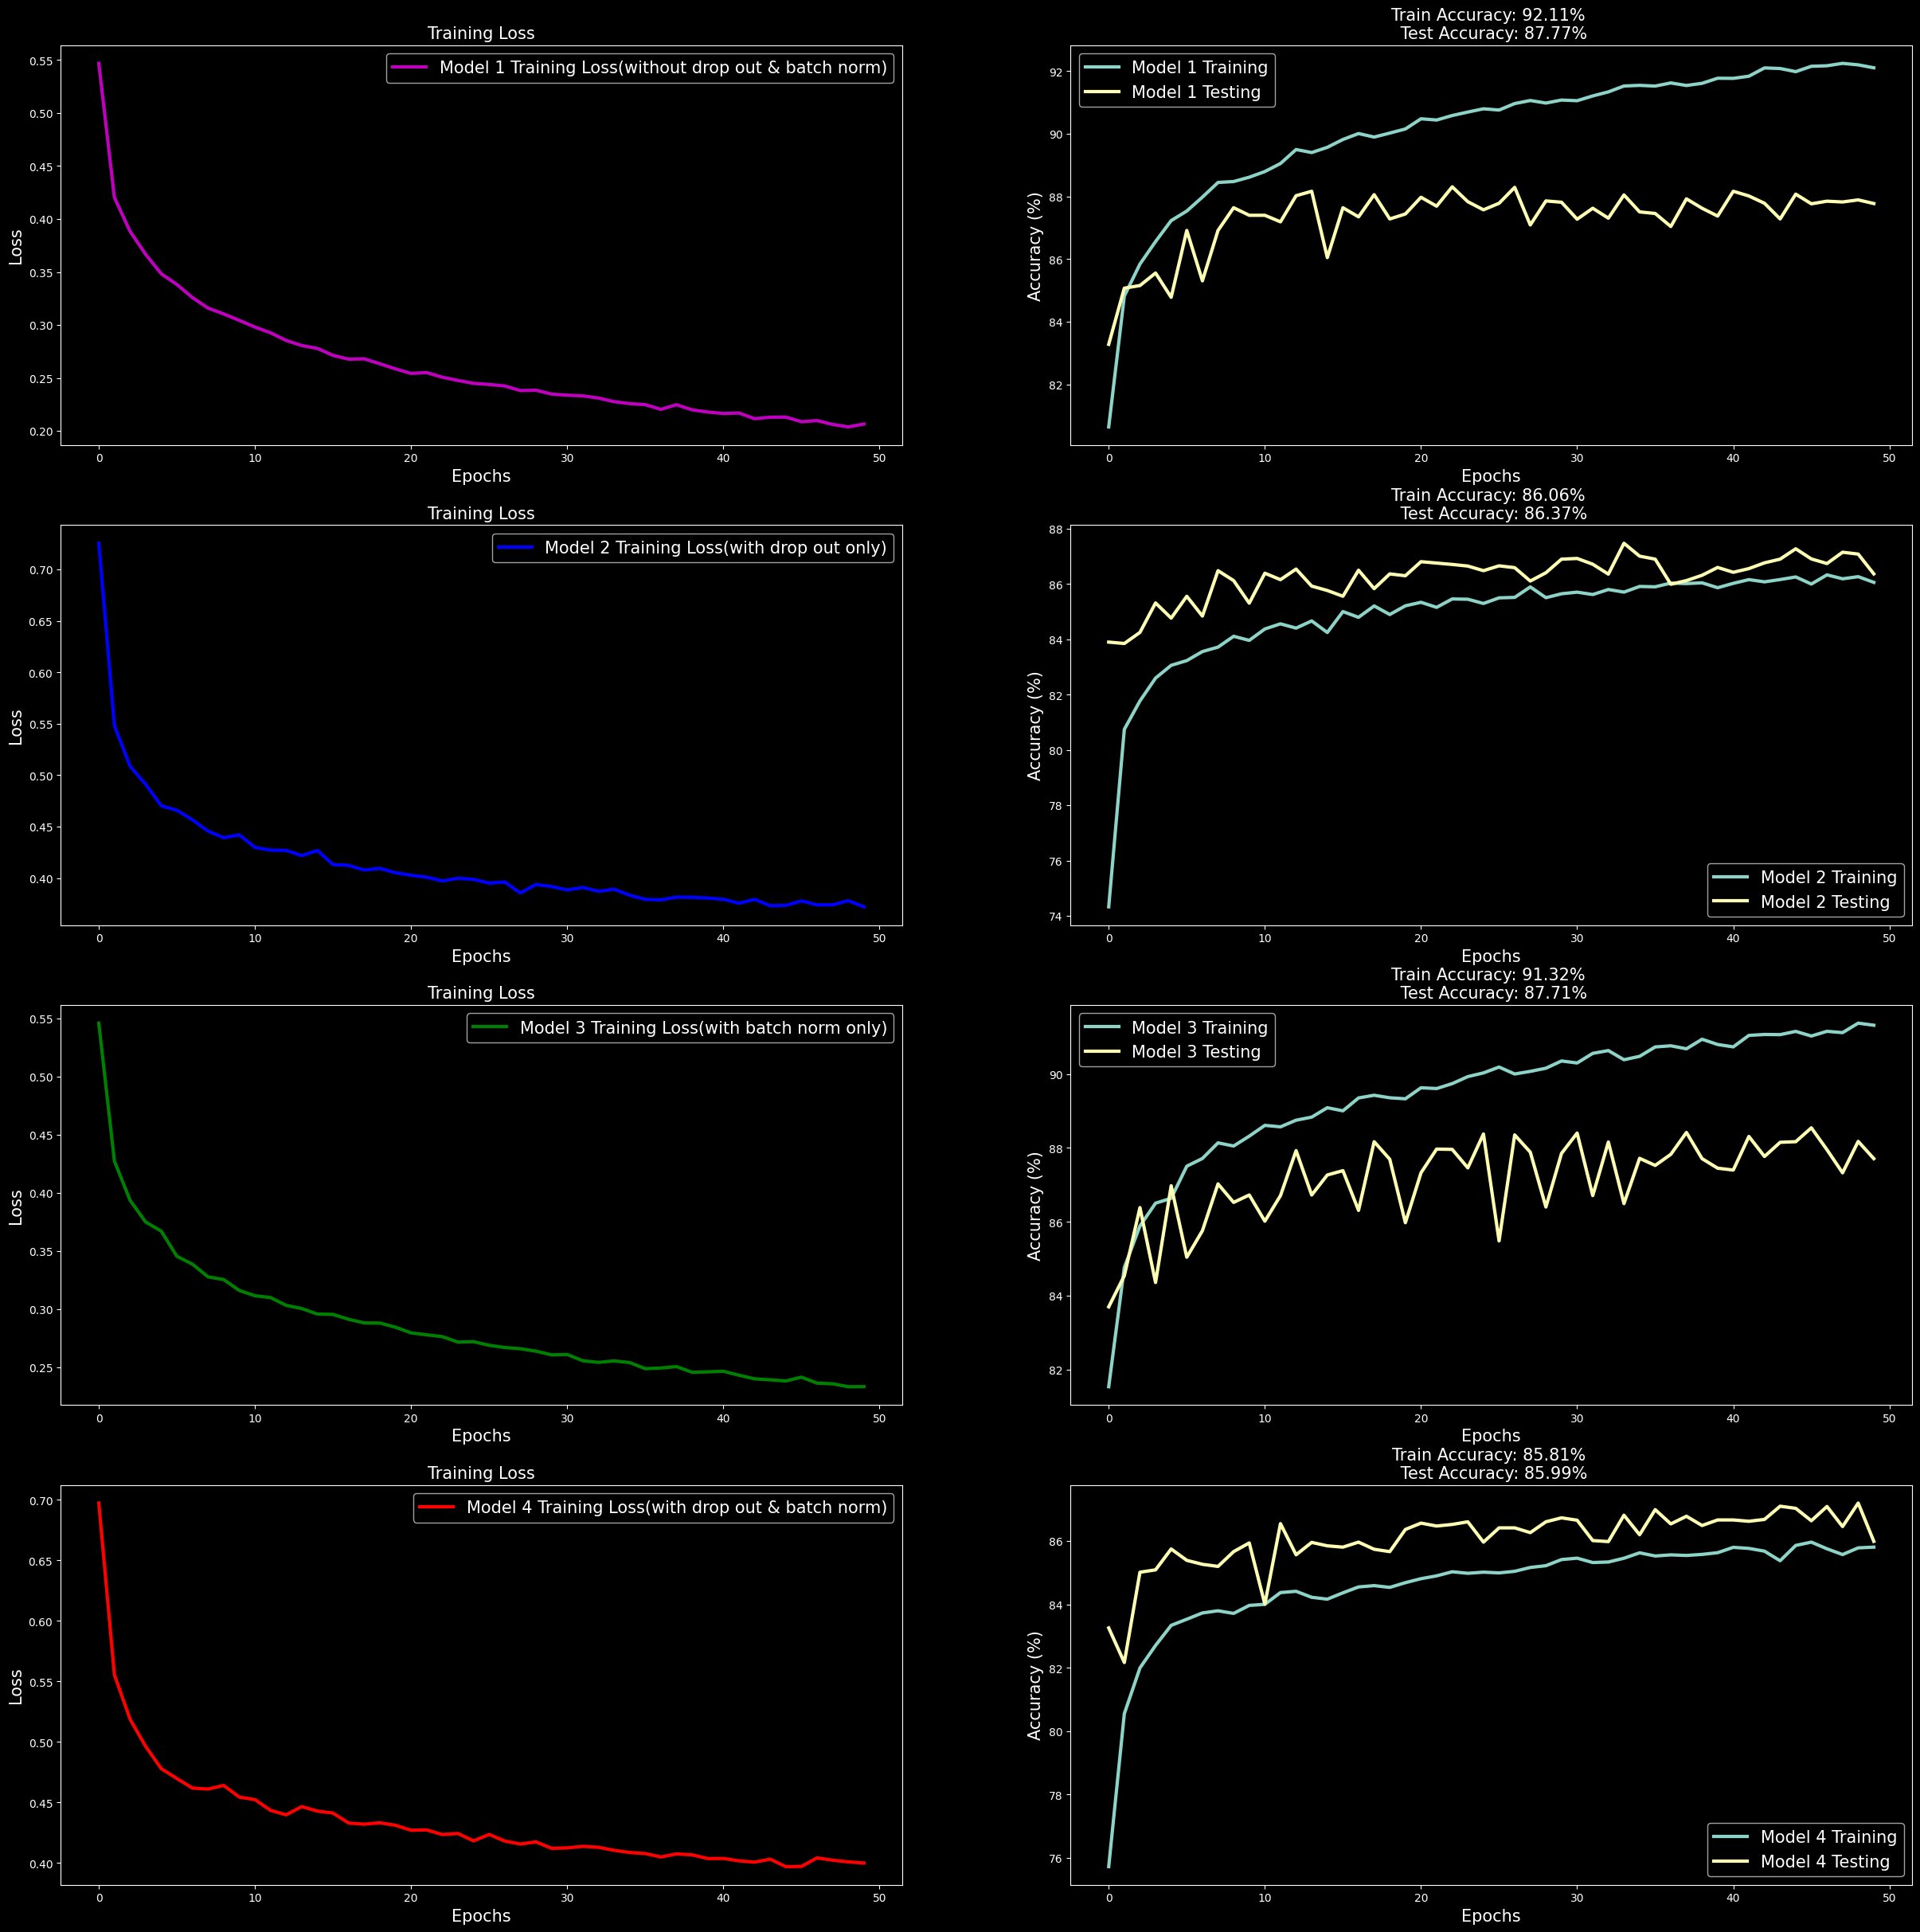

In [41]:
trainAcc1 = [100 * x for x in history1.history['accuracy']]
testAcc1 = [100 * x for x in history1.history['val_accuracy']]

trainAcc2 = [100 * x for x in history2.history['accuracy']]
testAcc2 = [100 * x for x in history2.history['val_accuracy']]

trainAcc3 = [100 * x for x in history3.history['accuracy']]
testAcc3 = [100 * x for x in history3.history['val_accuracy']]

trainAcc4 = [100 * x for x in history4.history['accuracy']]
testAcc4 = [100 * x for x in history4.history['val_accuracy']]

fig,ax = plt.subplots(4,2,figsize=(30,30))

ax[0, 0].plot(history1.history['loss'], 'm', lw=3, label='Model 1 Training Loss(without drop out & batch norm)')
ax[0, 0].set_xlabel('Epochs', fontsize = 15)
ax[0, 0].set_ylabel('Loss', fontsize = 15)
ax[0, 0].legend(fontsize = 15)
ax[0, 0].set_title('Training Loss', fontsize = 15)

ax[0, 1].plot(trainAcc1, label ='Model 1 Training', lw = 3)
ax[0, 1].plot(testAcc1, label ='Model 1 Testing', lw = 3)
ax[0, 1].set_xlabel('Epochs', fontsize = 15)
ax[0, 1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[0, 1].set_title(f'Train Accuracy: {trainAcc1[-1]:.2f}% \n Test Accuracy: {testAcc1[-1]:.2f}%', fontsize = 15)
ax[0, 1].legend(fontsize = 15)


ax[1, 0].plot(history2.history['loss'], 'b', lw=3, label='Model 2 Training Loss(with drop out only)')
ax[1, 0].set_xlabel('Epochs', fontsize = 15)
ax[1, 0].set_ylabel('Loss', fontsize = 15)
ax[1, 0].legend(fontsize = 15)
ax[1, 0].set_title('Training Loss', fontsize = 15)

ax[1, 1].plot(trainAcc2, label ='Model 2 Training', lw = 3)
ax[1, 1].plot(testAcc2, label ='Model 2 Testing', lw = 3)
ax[1, 1].set_xlabel('Epochs', fontsize = 15)
ax[1, 1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[1, 1].set_title(f'Train Accuracy: {trainAcc2[-1]:.2f}% \n Test Accuracy: {testAcc2[-1]:.2f}%', fontsize = 15)
ax[1, 1].legend(fontsize = 15)

ax[2, 0].plot(history3.history['loss'], 'g', lw=3, label='Model 3 Training Loss(with batch norm only)')
ax[2, 0].set_xlabel('Epochs', fontsize = 15)
ax[2, 0].set_ylabel('Loss', fontsize = 15)
ax[2, 0].legend(fontsize = 15)
ax[2, 0].set_title('Training Loss', fontsize = 15)

ax[2, 1].plot(trainAcc3, label ='Model 3 Training', lw = 3)
ax[2, 1].plot(testAcc3, label ='Model 3 Testing', lw = 3)
ax[2, 1].set_xlabel('Epochs', fontsize = 15)
ax[2, 1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[2, 1].set_title(f'Train Accuracy: {trainAcc3[-1]:.2f}% \n Test Accuracy: {testAcc3[-1]:.2f}%', fontsize = 15)
ax[2, 1].legend(fontsize = 15)

ax[3, 0].plot(history4.history['loss'], 'r', lw=3, label='Model 4 Training Loss(with drop out & batch norm)')
ax[3, 0].set_xlabel('Epochs', fontsize = 15)
ax[3, 0].set_ylabel('Loss', fontsize = 15)
ax[3, 0].legend(fontsize = 15)
ax[3, 0].set_title('Training Loss', fontsize = 15)

ax[3, 1].plot(trainAcc4, label ='Model 4 Training', lw = 3)
ax[3, 1].plot(testAcc4, label ='Model 4 Testing', lw = 3)
ax[3, 1].set_xlabel('Epochs', fontsize = 15)
ax[3, 1].set_ylabel('Accuracy (%)', fontsize = 15)
ax[3, 1].set_title(f'Train Accuracy: {trainAcc4[-1]:.2f}% \n Test Accuracy: {testAcc4[-1]:.2f}%', fontsize = 15)
ax[3, 1].legend(fontsize = 15)
plt.show()